In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [14]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=25, validation_data=(X_test,y_test),batch_size=100)

Epoch 1/25
600/600 [==============================] - 21s 35ms/step - loss: 7.5104e-04 - accuracy: 0.9999 - val_loss: 0.0536 - val_accuracy: 0.9864
Epoch 2/25
600/600 [==============================] - 21s 34ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0638 - val_accuracy: 0.9858
Epoch 3/25
600/600 [==============================] - 21s 35ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0547 - val_accuracy: 0.9867
Epoch 4/25
600/600 [==============================] - 21s 35ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0618 - val_accuracy: 0.9851
Epoch 5/25
600/600 [==============================] - 23s 39ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0632 - val_accuracy: 0.9865
Epoch 6/25
600/600 [==============================] - 20s 33ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0658 - val_accuracy: 0.9858
Epoch 7/25
600/600 [==============================] - 22s 36ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0612 - val_accur

In [25]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [26]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [22]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.987
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1127    0    1    1    2    2    0    2    0]
 [   1    1 1021    3    2    0    1    1    2    0]
 [   1    0    0 1003    0    1    0    1    4    0]
 [   0    0    0    0  965    0    5    1    2    9]
 [   1    0    0    9    0  869    2    1    6    4]
 [   5    2    1    2    2    2  941    0    3    0]
 [   0    2    6    4    0    0    0 1014    0    2]
 [   1    1    3    2    0    0    0    2  961    4]
 [   1    2    0    3    3    1    0    4    3  992]]


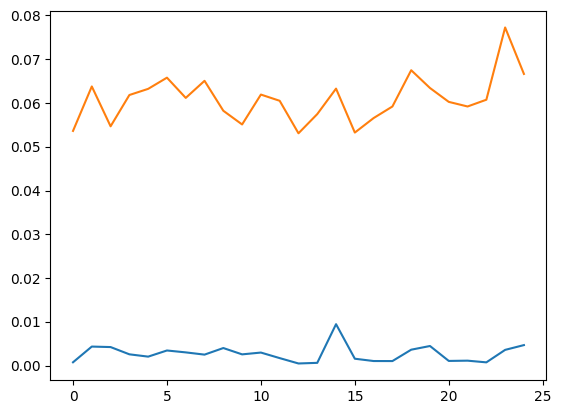

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

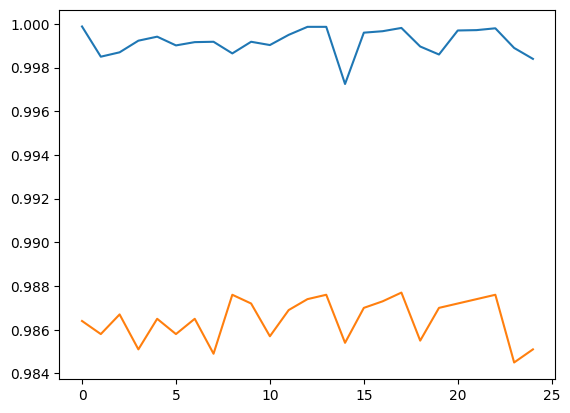

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])